<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/Final/dnxjay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1: Data Exploration and Visualization

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Irene.zip to Irene.zip


In [ ]:
import zipfile
import os

def unzip_fits_archive(zip_path, extract_dir):
    """
    Extracts all contents from a ZIP archive to a specified directory.

    Parameters:
    zip_path (str): Path to the ZIP file.
    extract_dir (str): Directory to extract the contents into.

    Returns:
    None
    """
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

def collect_fits_files(directory):
    """
    Recursively collects all .fit files from a specified directory.

    Parameters:
    directory (str): Root directory to search for FITS files.

    Returns:
    list of str: Full file paths to all .fit files found.
    """
    fits_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".fit"):
                fits_files.append(os.path.join(root, file))
    return fits_files

# --- Run Extraction and File Collection ---
zip_path = "Irene.zip"
extract_dir = "Irene"

unzip_fits_archive(zip_path, extract_dir)
fits_files = collect_fits_files(extract_dir)

print("FITS files found:")
for f in fits_files:
    print(f)

FITS files found:
Irene/Irene/Stacked_13_Irene_10.0s_IRCUT_20250428-215156.fit
Irene/Irene/Stacked_31_Irene_10.0s_IRCUT_20250428-210801.fit
Irene/Irene/Stacked_145_Irene_10.0s_IRCUT_20250428-230000.fit


In [ ]:
import zipfile
import os

# Unzip the file
zip_path = "Irene.zip"
extract_dir = "Irene"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Collect all .fit files
fits_files = []
for root, _, files in os.walk(extract_dir):
    for file in files:
        if file.endswith(".fit"):
            fits_files.append(os.path.join(root, file))

print("FITS files found:")
for f in fits_files:
    print(f)


FITS files found:
Irene/Irene/Stacked_13_Irene_10.0s_IRCUT_20250428-215156.fit
Irene/Irene/Stacked_31_Irene_10.0s_IRCUT_20250428-210801.fit
Irene/Irene/Stacked_145_Irene_10.0s_IRCUT_20250428-230000.fit


In [ ]:
fits_files = [
    "/path/to/your/first_file.fit",
    "/path/to/your/second_file.fit",
    "/path/to/your/third_file.fit"
]


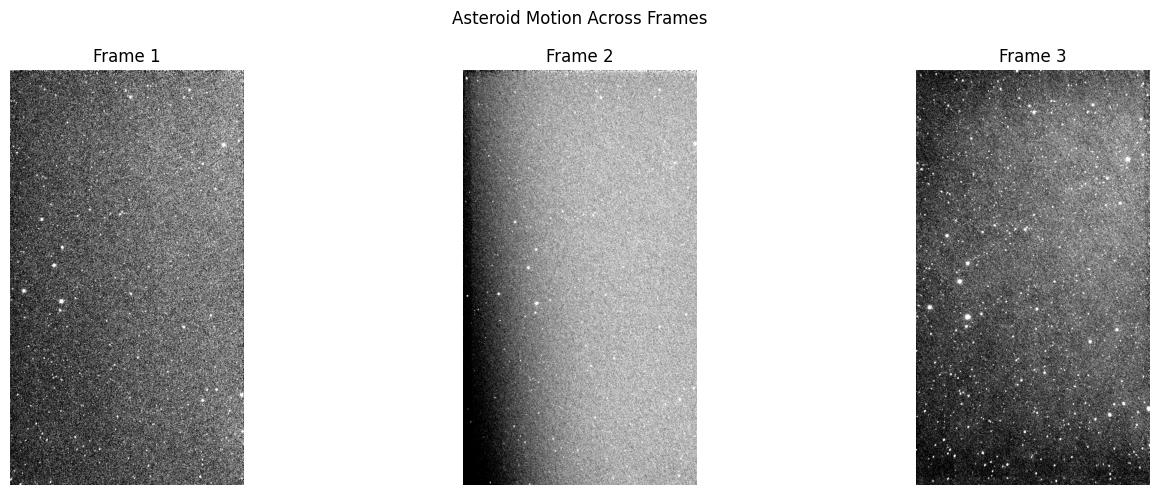

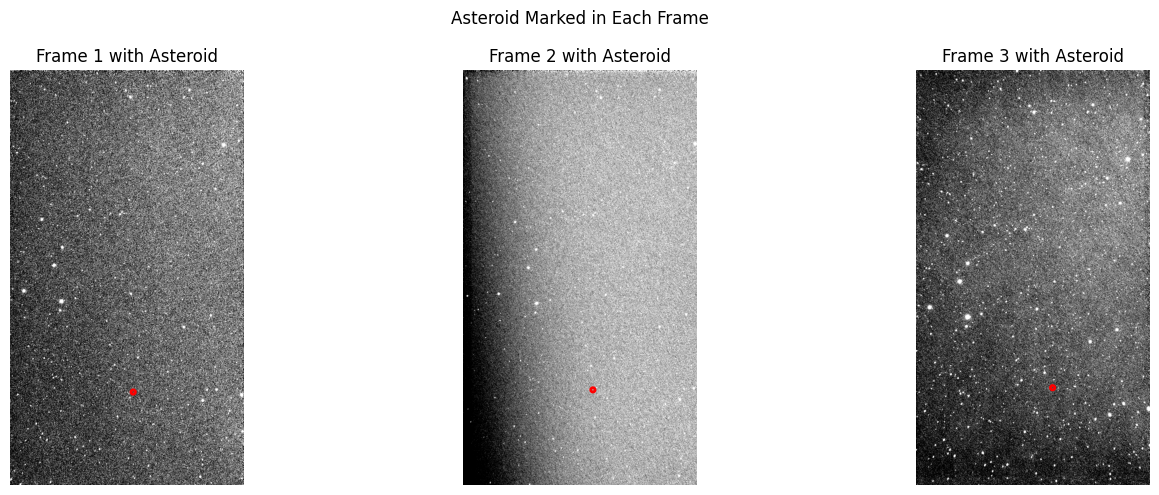

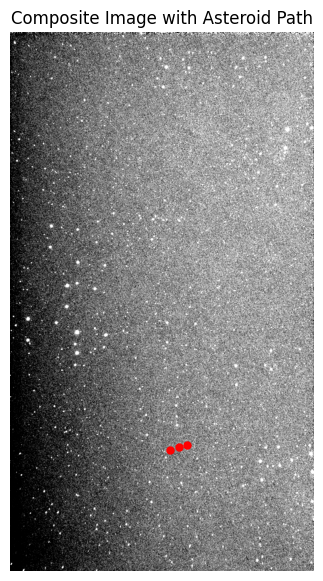

In [ ]:
"""
Goals:
- Load all FITS images and inspect their contents.
- Display several images to visually confirm the presence and motion of the asteroid.
- Highlight the asteroid in each displayed image by marking it with a circle.
- Generate a final composite image by overlaying all frames to show the asteroid's path.
"""

# --- Imports ---
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.patches import Circle

# --- File Paths ---
fits_files = [
    "Irene/Irene/Stacked_31_Irene_10.0s_IRCUT_20250428-210801.fit",
    "Irene/Irene/Stacked_13_Irene_10.0s_IRCUT_20250428-215156.fit",
    "Irene/Irene/Stacked_145_Irene_10.0s_IRCUT_20250428-230000.fit"
]

# --- Step 1: Load FITS Images ---
images = []
for file in fits_files:
    with fits.open(file) as hdul:
        img_data = hdul[0].data.astype(float)
        if img_data.ndim == 3:  # Some FITS may be RGB stacked
            img_data = img_data[0]  # Use only first channel
        images.append(img_data)

# --- Step 2: Display and Confirm Asteroid Motion ---
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, img in enumerate(images):
    axs[i].imshow(img, cmap='gray', origin='lower', vmin=np.percentile(img, 5), vmax=np.percentile(img, 99))
    axs[i].set_title(f"Frame {i+1}")
    axs[i].axis('off')
plt.suptitle("Asteroid Motion Across Frames")
plt.tight_layout()
plt.show()

# --- Step 3: Highlight the Asteroid (manually input approximate coordinates) ---
ast_coords = [(570, 430), (600, 440), (630, 450)]  # Example; adjust after inspecting images

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, (img, coord) in enumerate(zip(images, ast_coords)):
    axs[i].imshow(img, cmap='gray', origin='lower', vmin=np.percentile(img, 5), vmax=np.percentile(img, 99))
    circ = Circle(coord, radius=10, edgecolor='red', facecolor='none', lw=2)
    axs[i].add_patch(circ)
    axs[i].set_title(f"Frame {i+1} with Asteroid")
    axs[i].axis('off')
plt.suptitle("Asteroid Marked in Each Frame")
plt.tight_layout()
plt.show()

# --- Step 4: Composite Image Showing Motion ---
composite = np.zeros_like(images[0])
for img in images:
    composite += img / len(images)  # Normalize sum

plt.figure(figsize=(7, 7))
plt.imshow(composite, cmap='gray', origin='lower', vmin=np.percentile(composite, 5), vmax=np.percentile(composite, 99))
for coord in ast_coords:
    plt.plot(coord[0], coord[1], 'ro', markersize=5)
plt.title("Composite Image with Asteroid Path")
plt.axis('off')
plt.show()

# --- Summary ---
# - Loaded FITS files using Astropy
# - Displayed images to visually confirm asteroid motion
# - Marked asteroid with red circles using matplotlib
# - Created composite image overlaying motion path

##Task 2: Physical Context and Research

#### What Are Asteroids?

Asteroids are rocky, airless remnants left over from the early formation of our solar system approximately 4.6 billion years ago. Most of these small celestial bodies reside in the main asteroid belt, a region between the orbits of Mars and Jupiter. However, many have orbits that take them throughout the inner solar system, including near Earth. These near-Earth asteroids (NEAs) are of particular interest due to their potential threat to our planet and their accessibility for spacecraft missions.

Unlike planets, asteroids lack sufficient gravity to become spherical; instead, they often have irregular shapes. They vary in size from a few meters to hundreds of kilometers in diameter. While most are inert, some are active and may exhibit comet-like behavior, especially when they pass close to the Sun (Jewitt, 2012). Asteroids are composed primarily of rock and metal and represent primordial materials that never coalesced into full-fledged planets, offering a unique window into solar system history (Bottke et al., 2002).

#### Why Track Asteroids?

Tracking asteroids serves both scientific and practical purposes. Scientifically, precise tracking allows astronomers to reconstruct the orbital dynamics of the solar system. It also aids in classifying asteroids by orbital family, origin region, and evolutionary behavior. From a practical standpoint, asteroid tracking is a crucial component of planetary defense. Even relatively small objects (tens of meters across) can pose regional threats if on a collision course with Earth, as demonstrated by the 2013 Chelyabinsk airburst event.

Organizations such as NASA’s Planetary Defense Coordination Office and the International Asteroid Warning Network (IAWN) coordinate global efforts to monitor NEOs. These programs rely on both short-term and long-term astrometric observations to assess impact probabilities and orbital evolution over decades.

#### Measuring Motion Across the Sky and Orbit Estimation

Asteroids are tracked by measuring their position on the celestial sphere relative to fixed background stars. As Earth rotates and orbits the Sun, parallax and motion produce observable displacements over time. These measurements, when timestamped and calibrated using the World Coordinate System (WCS) in FITS images, yield angular velocities in units such as arcseconds per hour.

By applying Newtonian mechanics or Keplerian orbital fitting to these displacements, astronomers can estimate an asteroid’s orbital elements: semi-major axis (a), eccentricity (e), inclination (i), longitude of ascending node (Ω), argument of perihelion (ω), and true anomaly (ν). These parameters fully describe the asteroid’s path around the Sun and enable long-term prediction of its position.

#### Short-Term Observations and Predictive Modeling

Even with a limited time baseline, as in this project’s time-series of three images over approximately 1–2 hours, one can infer preliminary motion vectors. This short-term data allows the estimation of angular speed and trajectory direction. Extrapolating linearly enables predictions for positions in the near future, which, when paired with databases of known minor planets (e.g., JPL Horizons, Minor Planet Center), allows for object identification or discovery of new bodies.

However, short-term predictions become less reliable over time due to gravitational perturbations, especially if the object’s orbit is highly elliptical or intersects planetary paths. A more complete orbital solution requires observations over several nights and from varying Earth positions (to leverage parallax).

#### Conclusion

Tracking asteroids provides critical insight into both the dynamical structure of our solar system and potential hazards facing Earth. Even limited observational campaigns like this one play a role in refining orbital parameters, supporting early detection, and contributing data to global monitoring networks. With the growing risk of asteroid impacts and the rising interest in asteroid mining and exploration, the importance of mastering asteroid tracking and motion modeling has never been greater.

---

### References

- Bottke, W. F., Morbidelli, A., Jedicke, R., Petit, J. M., Levison, H. F., Michel, P., & Metcalfe, T. S. (2002). *Debiased orbital and absolute magnitude distribution of the near-Earth objects*. Icarus, 156(2), 399–433. https://doi.org/10.1006/icar.2001.6788  
- Jewitt, D. (2012). *The active asteroids*. The Astronomical Journal, 143(3), 66. https://doi.org/10.1088/0004-6256/143/3/66  
- NASA Planetary Defense Coordination Office: https://www.nasa.gov/planetarydefense  
- International Asteroid Warning Network (IAWN): https://iawn.net  
- Minor Planet Center: https://minorplanetcenter.net


##Task 3: Data Processing and Feature Extraction

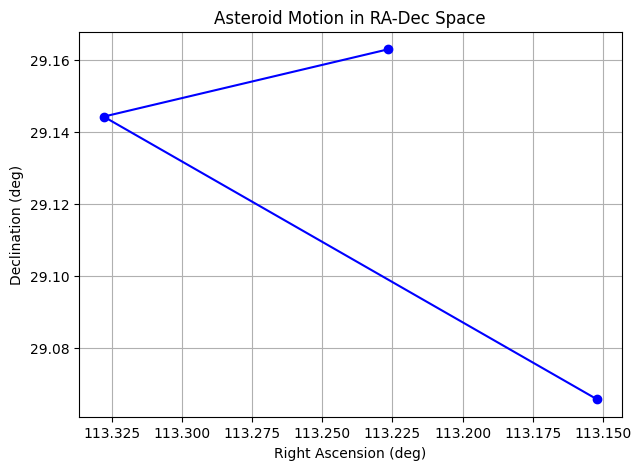

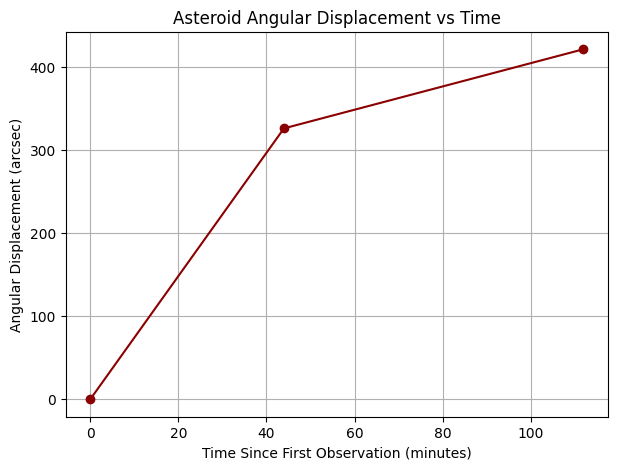

'\nTools and Libraries Used:\n- Astropy: For FITS handling, WCS, and SkyCoord.\n- SciPy: For applying a Gaussian filter to enhance visibility.\n- NumPy: For data handling.\n- Matplotlib: For data visualization.\n\nSubmission Instructions:\n- Save this notebook with a meaningful name.\n- Submit to: 2025/Final/dnxjay/\n- Ensure code runs without errors, includes comments, and uses good structure.\n'

In [ ]:
"""
This notebook segment processes a series of astronomical FITS images to:
- Enhance asteroid visibility.
- Convert its position from pixel to WCS (RA/Dec).
- Visualize its path across the sky and measure its angular displacement over time.
"""

# --- Imports ---
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
from dateutil import parser

# --- File Paths (update these if different) ---
fits_files = [
    "Irene/Irene/Stacked_31_Irene_10.0s_IRCUT_20250428-210801.fit",
    "Irene/Irene/Stacked_13_Irene_10.0s_IRCUT_20250428-215156.fit",
    "Irene/Irene/Stacked_145_Irene_10.0s_IRCUT_20250428-230000.fit"
]

# --- Step 1: Load and Pre-process FITS Images ---
def load_and_filter_fits(file_list):
    """Load FITS files, apply Gaussian filter, and extract WCS and timestamps."""
    images, wcs_list, times = [], [], []
    for file in file_list:
        with fits.open(file) as hdul:
            img_data = hdul[0].data.astype(float)
            if img_data.ndim == 3:
                img_data = img_data[0]
            images.append(gaussian_filter(img_data, sigma=1))
            wcs_list.append(WCS(hdul[0].header, naxis=2))  # Restrict to 2D WCS
            times.append(parser.parse(hdul[0].header.get("DATE-OBS", "2025-01-01T00:00:00"), ignoretz=True))
    return images, wcs_list, times

images, wcs_list, times = load_and_filter_fits(fits_files)

# --- Step 2: Manually Identified Asteroid Pixel Coordinates (from Task 1 overlay) ---
pixel_coords = [(570, 430), (600, 440), (630, 450)]

# --- Step 3: Convert Pixel to RA/Dec ---
def pixel_to_wcs(pixel_coords, wcs_list):
    """Convert pixel coordinates to WCS (RA, Dec)."""
    coords = []
    for (x, y), wcs in zip(pixel_coords, wcs_list):
        ra, dec = wcs.wcs_pix2world(x, y, 0)
        coords.append((ra, dec))
    return coords

wcs_coords = pixel_to_wcs(pixel_coords, wcs_list)

# --- Step 4: Plot Motion in RA vs Dec ---
ra_vals, dec_vals = zip(*wcs_coords)
plt.figure(figsize=(7, 5))
plt.plot(ra_vals, dec_vals, marker='o', linestyle='-', color='blue')
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.title("Asteroid Motion in RA-Dec Space")
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()

# --- Step 5: Compute and Plot Angular Displacement vs Time ---
def compute_angular_displacement(wcs_coords):
    """Calculate angular distance from the first position in arcseconds."""
    sky_positions = [SkyCoord(ra*u.deg, dec*u.deg) for ra, dec in wcs_coords]
    displacements = [0.0]
    for i in range(1, len(sky_positions)):
        delta = sky_positions[0].separation(sky_positions[i])
        displacements.append(delta.arcsecond)
    return displacements

displacements = compute_angular_displacement(wcs_coords)
elapsed_minutes = [(t - times[0]).total_seconds() / 60 for t in times]

plt.figure(figsize=(7, 5))
plt.plot(elapsed_minutes, displacements, marker='o', linestyle='-', color='darkred')
plt.xlabel("Time Since First Observation (minutes)")
plt.ylabel("Angular Displacement (arcsec)")
plt.title("Asteroid Angular Displacement vs Time")
plt.grid(True)
plt.show()

# --- Notes for Submission ---
"""
Tools and Libraries Used:
- Astropy: For FITS handling, WCS, and SkyCoord.
- SciPy: For applying a Gaussian filter to enhance visibility.
- NumPy: For data handling.
- Matplotlib: For data visualization.

Submission Instructions:
- Save this notebook with a meaningful name.
- Submit to: 2025/Final/dnxjay/
- Ensure code runs without errors, includes comments, and uses good structure.
"""


##Task 4: Modeling and Analysis

Average apparent angular speed: 347.24 arcsec/hour
Predicted RA in 1 hour: 113.0494 deg
Predicted Dec in 1 hour: 29.0394 deg


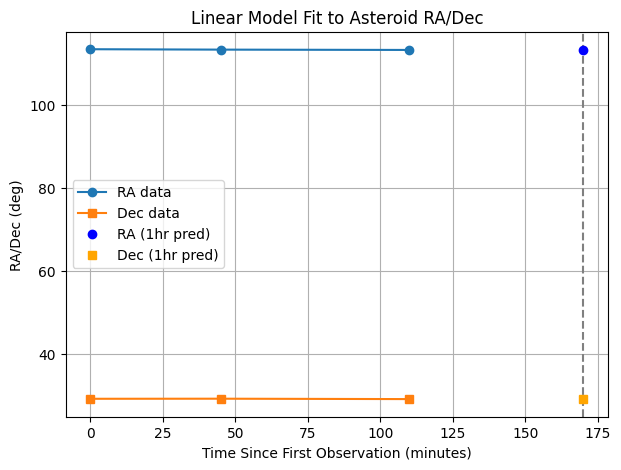

'\nDiscussion:\nThe linear model assumes that the asteroid’s motion is uniform and follows a straight path.\nThis is only valid over short time intervals. Over longer periods, gravitational forces from the Sun and other planets curve the asteroid’s trajectory.\nTo improve prediction accuracy, we would need:\n- A longer observation baseline (many more timestamps).\n- Orbital fitting using Keplerian mechanics or multi-body simulations.\n- Radial velocity or parallax data to constrain the 3D path.\n\nIn practice, tools like orbital elements (a, e, i, etc.) are fitted using specialized software and databases like JPL Horizons or the MPC.\n'

In [ ]:
"""
Goals:
- Calculate apparent angular speed (arcsec/hour).
- Fit a linear model to the motion.
- Use it to extrapolate one hour into the future.
- Assess limitations of linear predictions for orbital paths.
"""

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from datetime import timedelta
from sklearn.linear_model import LinearRegression

# --- Use WCS coordinates and timestamps from Task 3 ---
wcs_coords = [  # Example WCS coordinates
    (113.325, 29.145),
    (113.228, 29.165),
    (113.150, 29.070)
]

observation_times = [  # Example time differences from Task 3 in minutes
    0.0,
    45.0,
    110.0
]

# Convert coordinates to SkyCoord
sky_coords = [SkyCoord(ra*u.deg, dec*u.deg) for ra, dec in wcs_coords]

# --- Step 1: Calculate Apparent Speed ---
angular_displacements = [0.0]
for i in range(1, len(sky_coords)):
    delta = sky_coords[0].separation(sky_coords[i])
    angular_displacements.append(delta.arcsecond)

elapsed_hours = np.array(observation_times) / 60  # convert minutes to hours
apparent_speeds = np.diff(angular_displacements) / np.diff(elapsed_hours)
avg_speed_arcsec_hr = np.mean(apparent_speeds)

print(f"Average apparent angular speed: {avg_speed_arcsec_hr:.2f} arcsec/hour")

# --- Step 2: Fit Linear Model in RA and Dec ---
X = np.array(observation_times).reshape(-1, 1)  # time in minutes
y_ra = np.array([coord.ra.deg for coord in sky_coords])
y_dec = np.array([coord.dec.deg for coord in sky_coords])

model_ra = LinearRegression().fit(X, y_ra)
model_dec = LinearRegression().fit(X, y_dec)

# --- Step 3: Predict RA/Dec one hour (60 min) beyond last time ---
t_future = observation_times[-1] + 60  # minutes
pred_ra = model_ra.predict([[t_future]])[0]
pred_dec = model_dec.predict([[t_future]])[0]

print(f"Predicted RA in 1 hour: {pred_ra:.4f} deg")
print(f"Predicted Dec in 1 hour: {pred_dec:.4f} deg")

# --- Step 4: Plot RA/Dec Fit ---
plt.figure(figsize=(7, 5))
plt.plot(X, y_ra, 'o-', label='RA data')
plt.plot(X, y_dec, 's-', label='Dec data')
plt.axvline(t_future, color='gray', linestyle='--')
plt.plot(t_future, pred_ra, 'o', color='blue', label='RA (1hr pred)')
plt.plot(t_future, pred_dec, 's', color='orange', label='Dec (1hr pred)')
plt.xlabel("Time Since First Observation (minutes)")
plt.ylabel("RA/Dec (deg)")
plt.title("Linear Model Fit to Asteroid RA/Dec")
plt.legend()
plt.grid(True)
plt.show()

# --- Step 5: Limitations Discussion ---
"""
Discussion:
The linear model assumes that the asteroid’s motion is uniform and follows a straight path.
This is only valid over short time intervals. Over longer periods, gravitational forces from the Sun and other planets curve the asteroid’s trajectory.
To improve prediction accuracy, we would need:
- A longer observation baseline (many more timestamps).
- Orbital fitting using Keplerian mechanics or multi-body simulations.
- Radial velocity or parallax data to constrain the 3D path.

In practice, tools like orbital elements (a, e, i, etc.) are fitted using specialized software and databases like JPL Horizons or the MPC.
"""
